## CNN Architectures : VGG, Resnet, InceptionNet, XceptionNet 

### UseCases : Image Feature Extraction + Transfer Learning



## 1. CNN Architectures

# VGG16 

1. This network contains total 16 layers in which weights and bias parameters are learnt.    
2. A total of 13 convolutional layers are stacked one after the other and 3 dense layers for classification.     
3. The number of filters in the convolution layers follow an increasing pattern (similar to decoder architecture of autoencoder).     
4. The informative features are obtained by max pooling layers applied at different steps in the architecture.    
5. The dense layers comprises of 4096, 4096, and 1000 nodes each.   
6. The cons of this architecture are that it is slow to train and produces the model with very large size.   


In [29]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model

_input = Input((224,224,1)) 

conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(1000, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)

## PreTrained Model : VGG16

Now, we can perform following steps : 
1. import VGG16 architecture from keras.applications  
2. Add the saved weights to the architecture 
3. Use model to perform predictions 

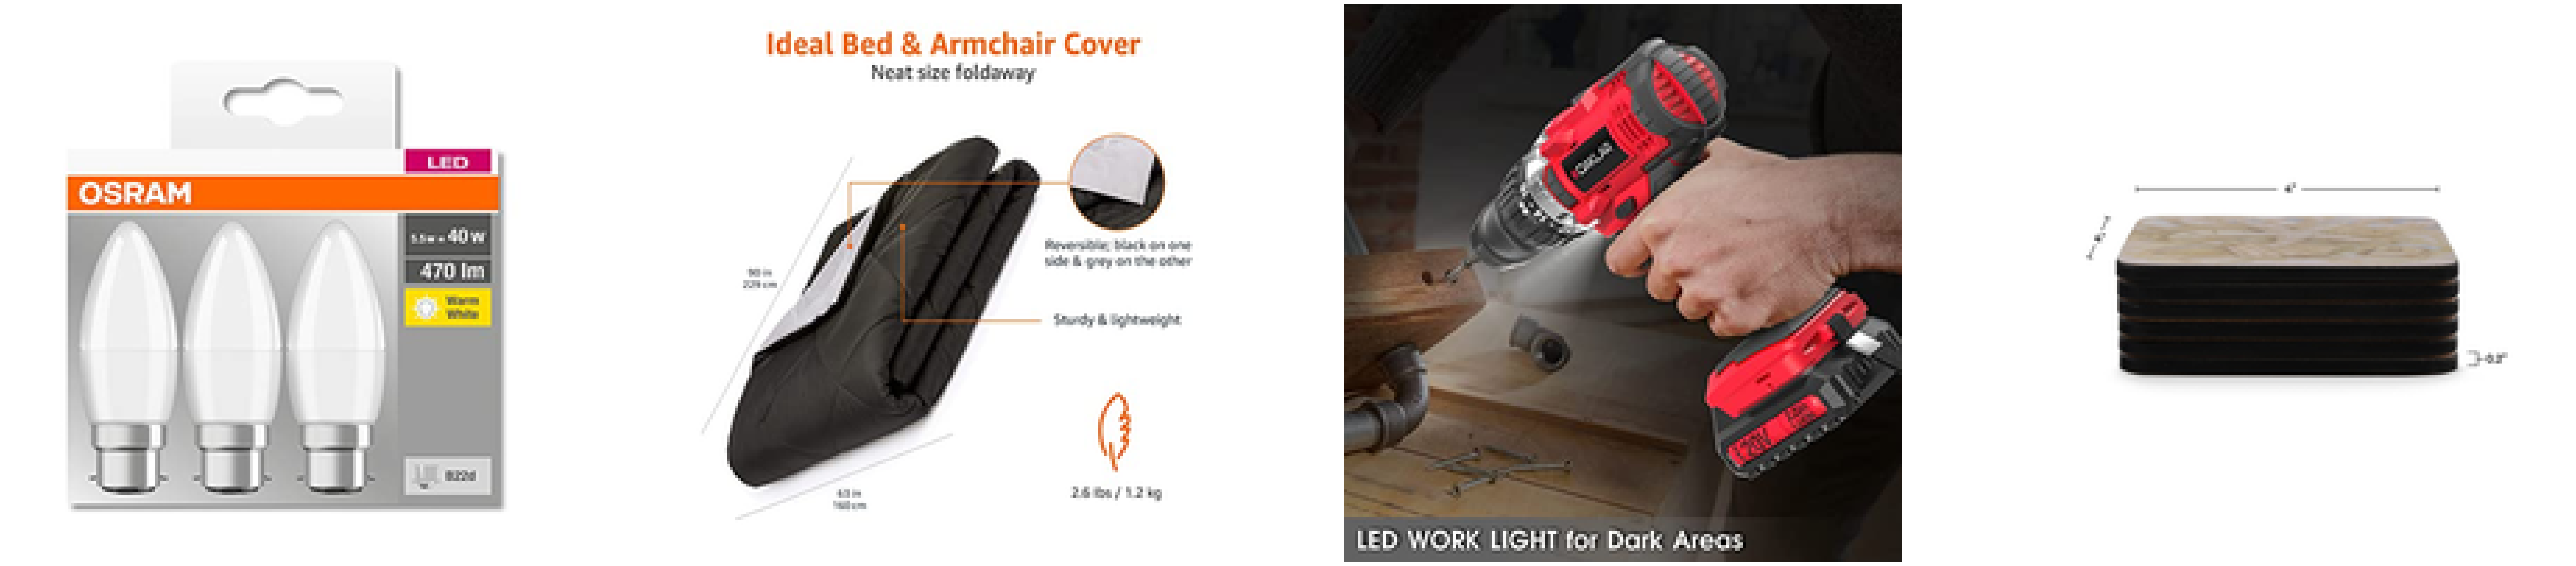

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


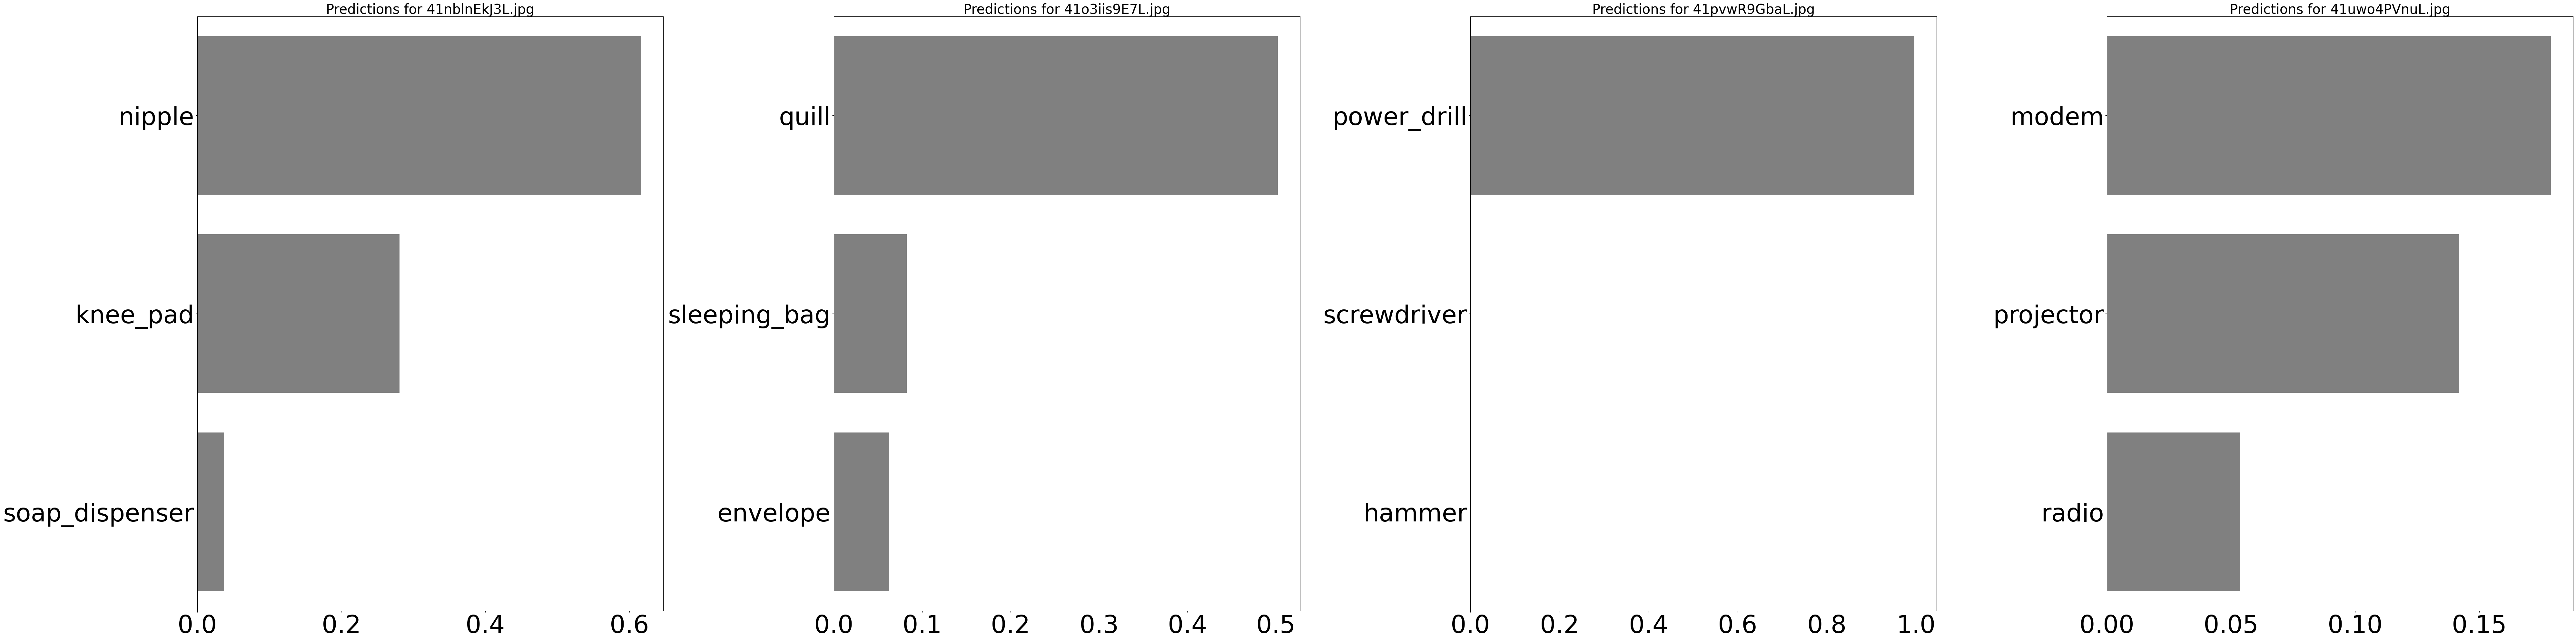

In [34]:
from keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import numpy as np 
import os 

# Load the VGG16 model with pre-trained weights
vgg16_weights = 'weights/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
vgg16_model = VGG16(weights=vgg16_weights)

# Directory containing images
image_directory = "images/"

# List all image files in the directory
imgs = [os.path.join(image_directory, img) for img in os.listdir(image_directory) if img.endswith(('.jpg', '.jpeg', '.png'))]

# If you only want a specific range of images (e.g., the 5th to 8th images)
imgs = imgs[4:8]

def _load_image(img_path):
    """Load and preprocess an image for the VGG16 model."""
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to 224x224
    img = image.img_to_array(img)  # Convert to array
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = preprocess_input(img)  # Preprocess for VGG16
    return img 

def _get_predictions(_model):
    """Get predictions from the model and display results."""
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    
    # Display original images
    for i in range(len(imgs)):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.LANCZOS))
        ax[i].axis('off')  # Hide axes for clarity
    plt.show()
    
    # Create a new figure for predictions
    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    
    # Get predictions for each image
    for i, img_path in enumerate(imgs):
        img = _load_image(img_path)
        preds = decode_predictions(_model.predict(img), top=3)[0]  # Get top 3 predictions
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        axes[i].set_title(f"Predictions for {os.path.basename(img_path)}", fontsize=30)  # Title for each subplot
    
    f.tight_layout()
    plt.show()

# Call the prediction function
_get_predictions(vgg16_model)


## 1.2 &nbsp;&nbsp; VGG19 

VGG19 is a similar model architecure as VGG16 with three additional convolutional layers, it consists of a total of 16 Convolution layers and 3 dense layers.  Following is the architecture of VGG19 model. In VGG networks, the use of 3 x 3 convolutions with stride 1 gives an effective receptive filed equivalent to 7 * 7. This means there are fewer parameters to train. 




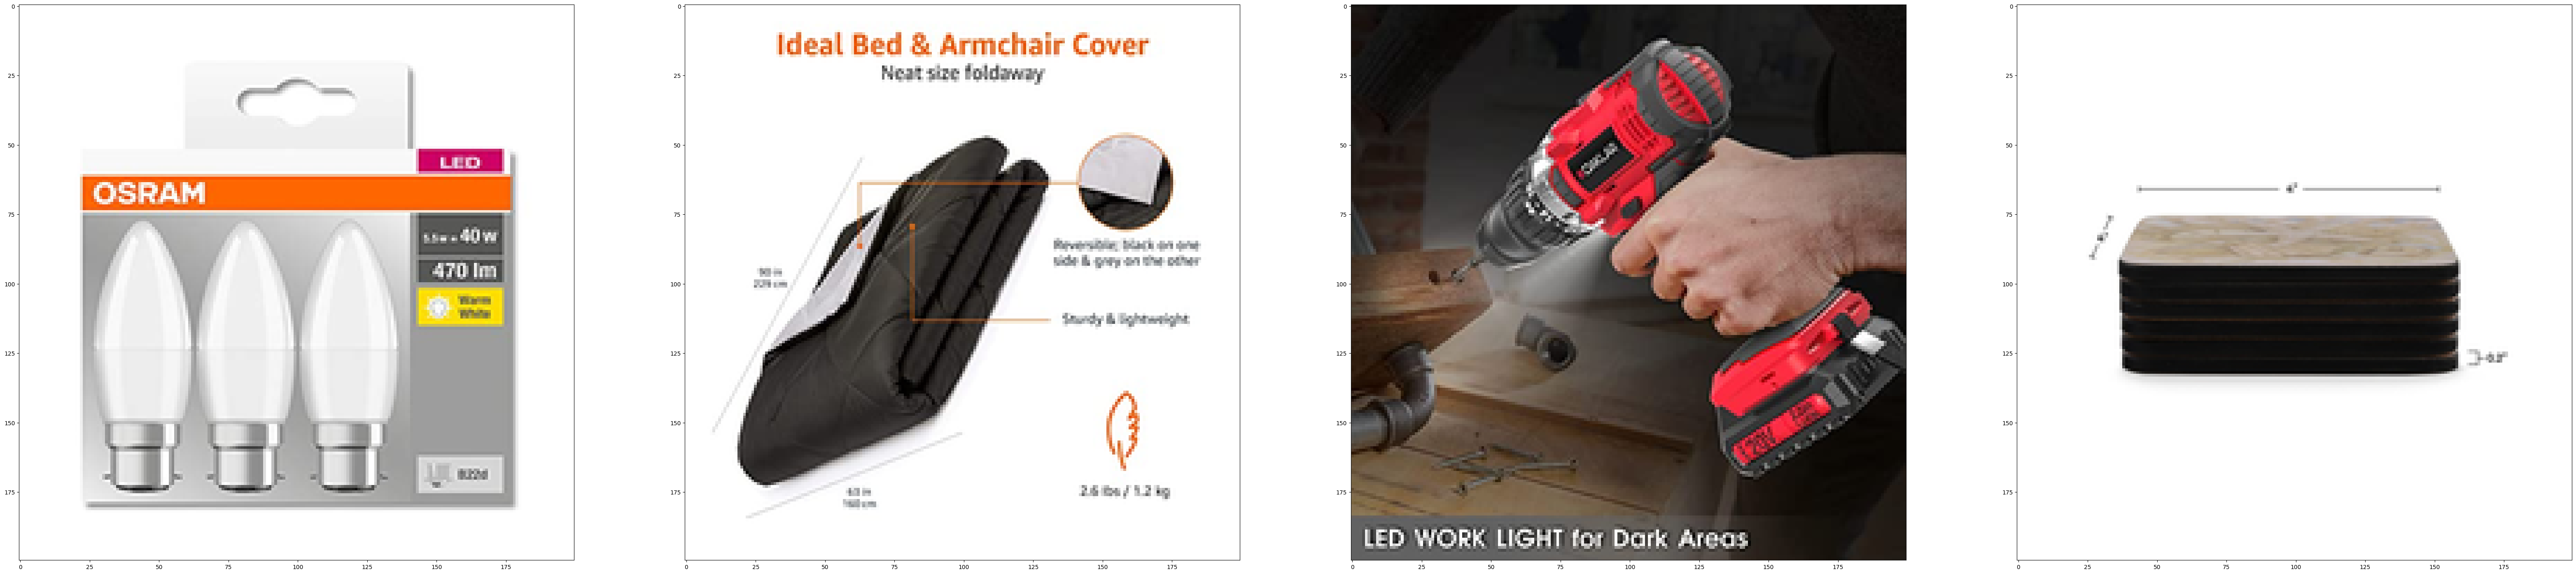

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


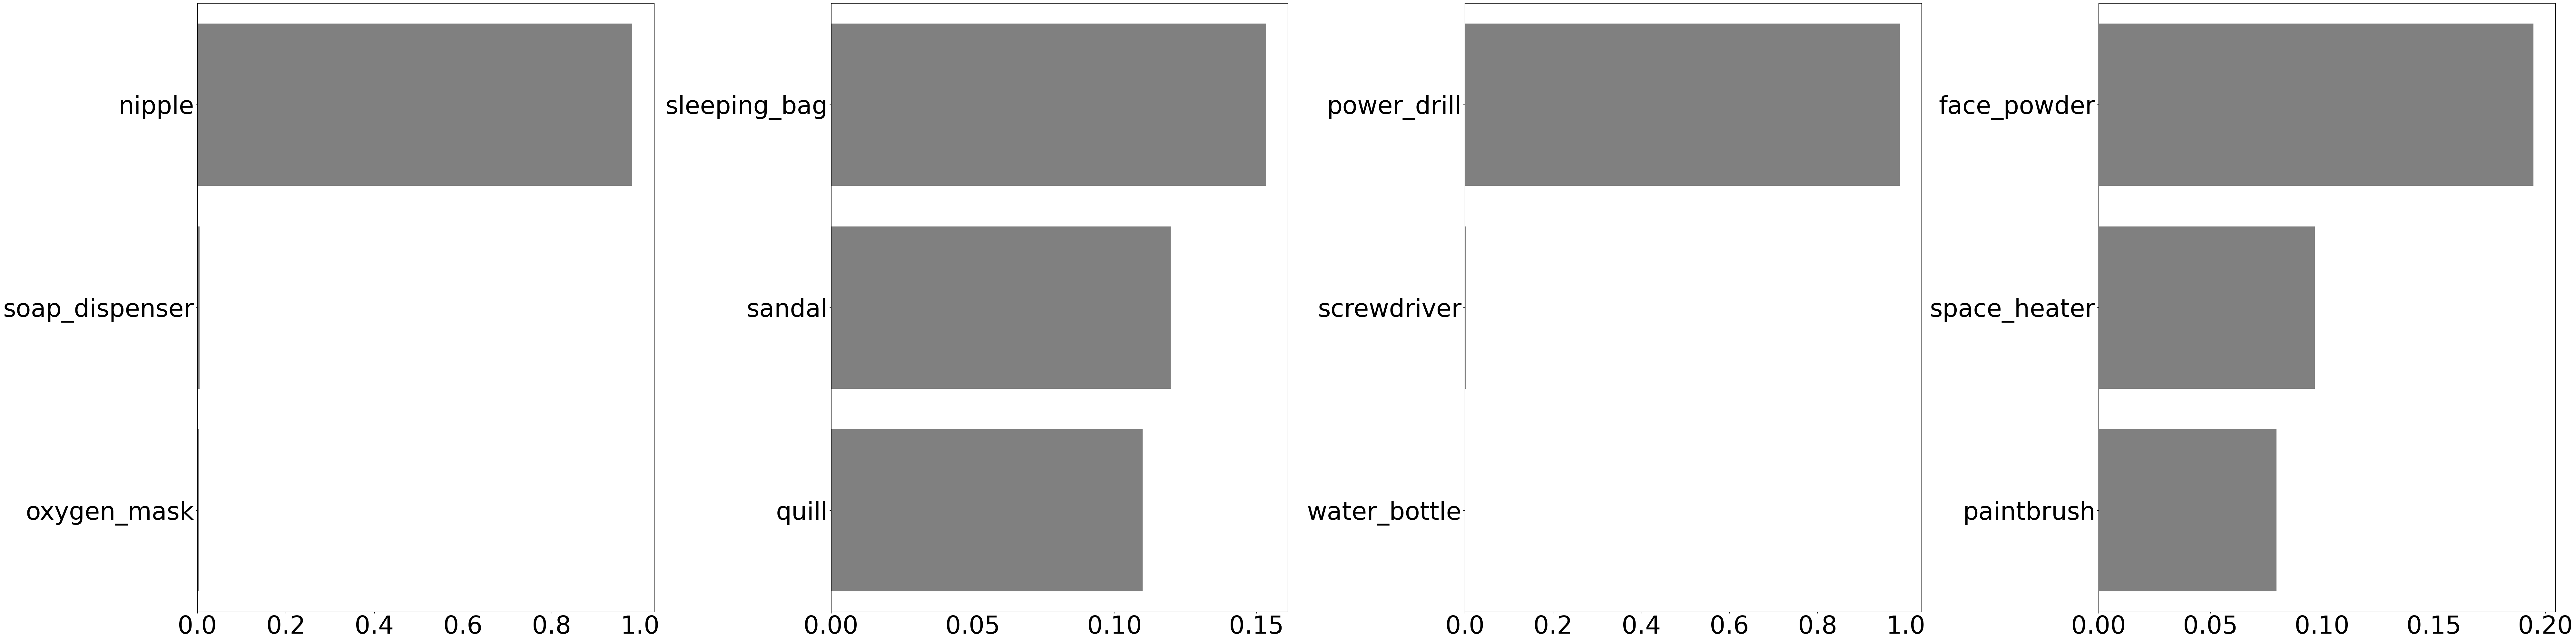

In [32]:
from keras.applications.vgg19 import VGG19
vgg19_weights = 'weights/vgg19_weights_tf_dim_ordering_tf_kernels.h5'
vgg19_model = VGG19(weights=vgg19_weights)
_get_predictions(vgg19_model)

## 1.3 InceptionNets

Also known as GoogleNet consists of total 22 layers and was the winning model of 2014 image net challenge. 

- Inception modules are the fundamental block of InceptionNets. The key idea of inception module is to design good local network topology (network within a network)  
- These modules or blocks acts as the multi-level feature extractor in which convolutions of different sizes are obtained to create a diversified feature map
- The inception modules also consists of 1 x 1 convolution blocks whose role is to perform dimentionaltiy reduction.  
- By performing the 1x1 convolution, the inception block preserves the spatial dimentions but reduces the depth. So the overall network's dimentions are not increased exponentially.  
- Apart from the regular output layer, this network also consists of two auxillary classification outputs which are used to inject gradients at lower layers.  


### Pre-Trained Model : InceptionV3

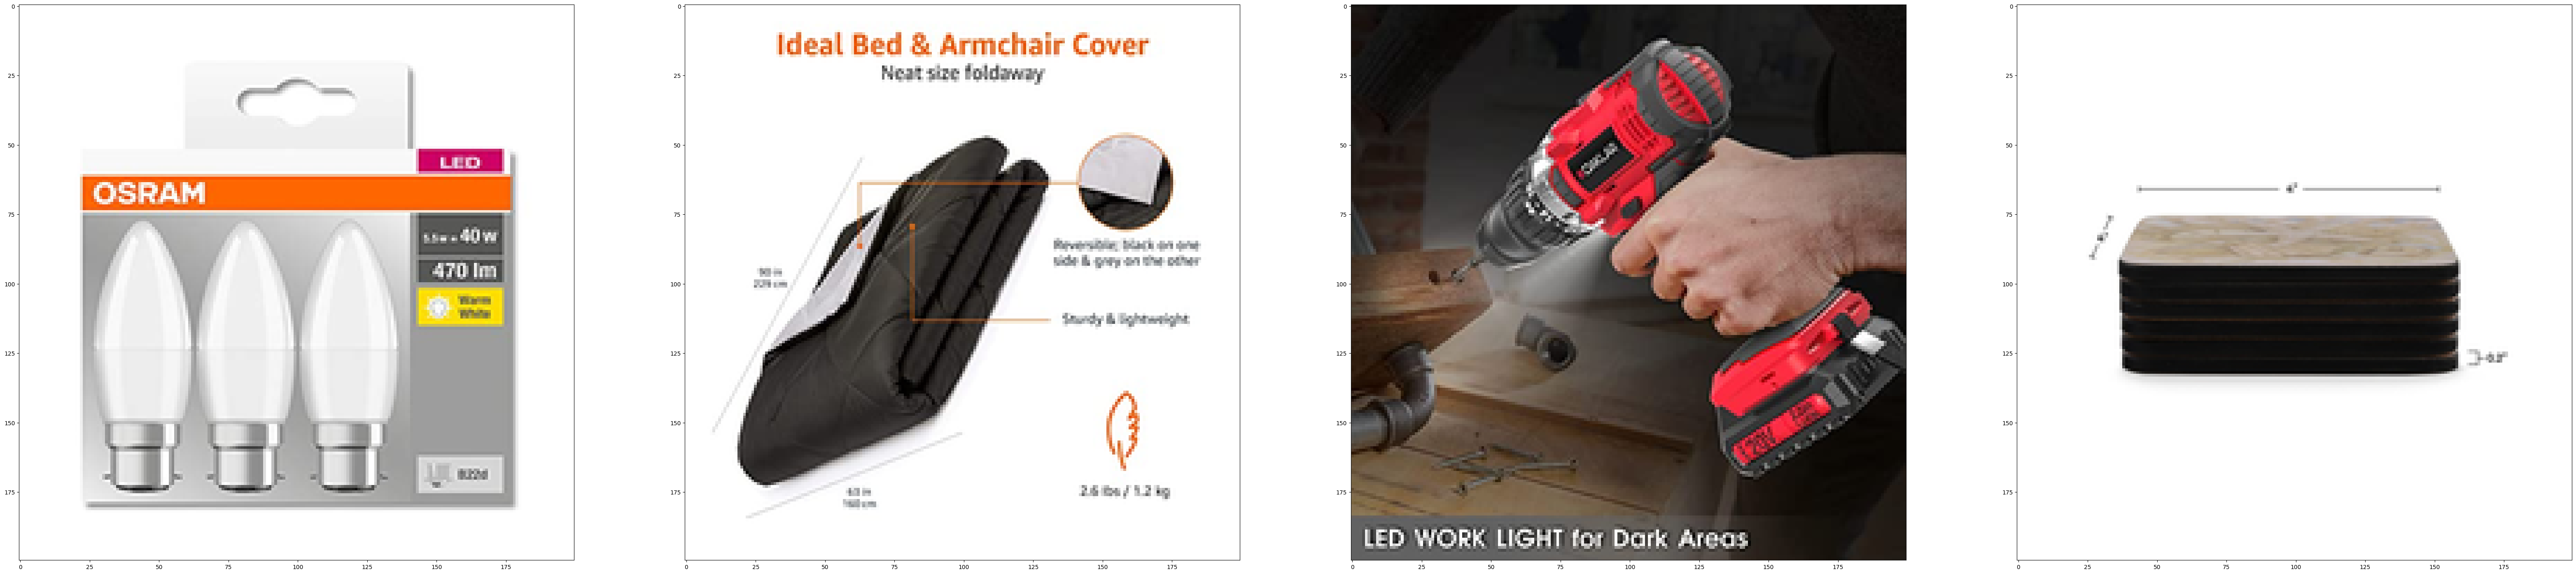

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


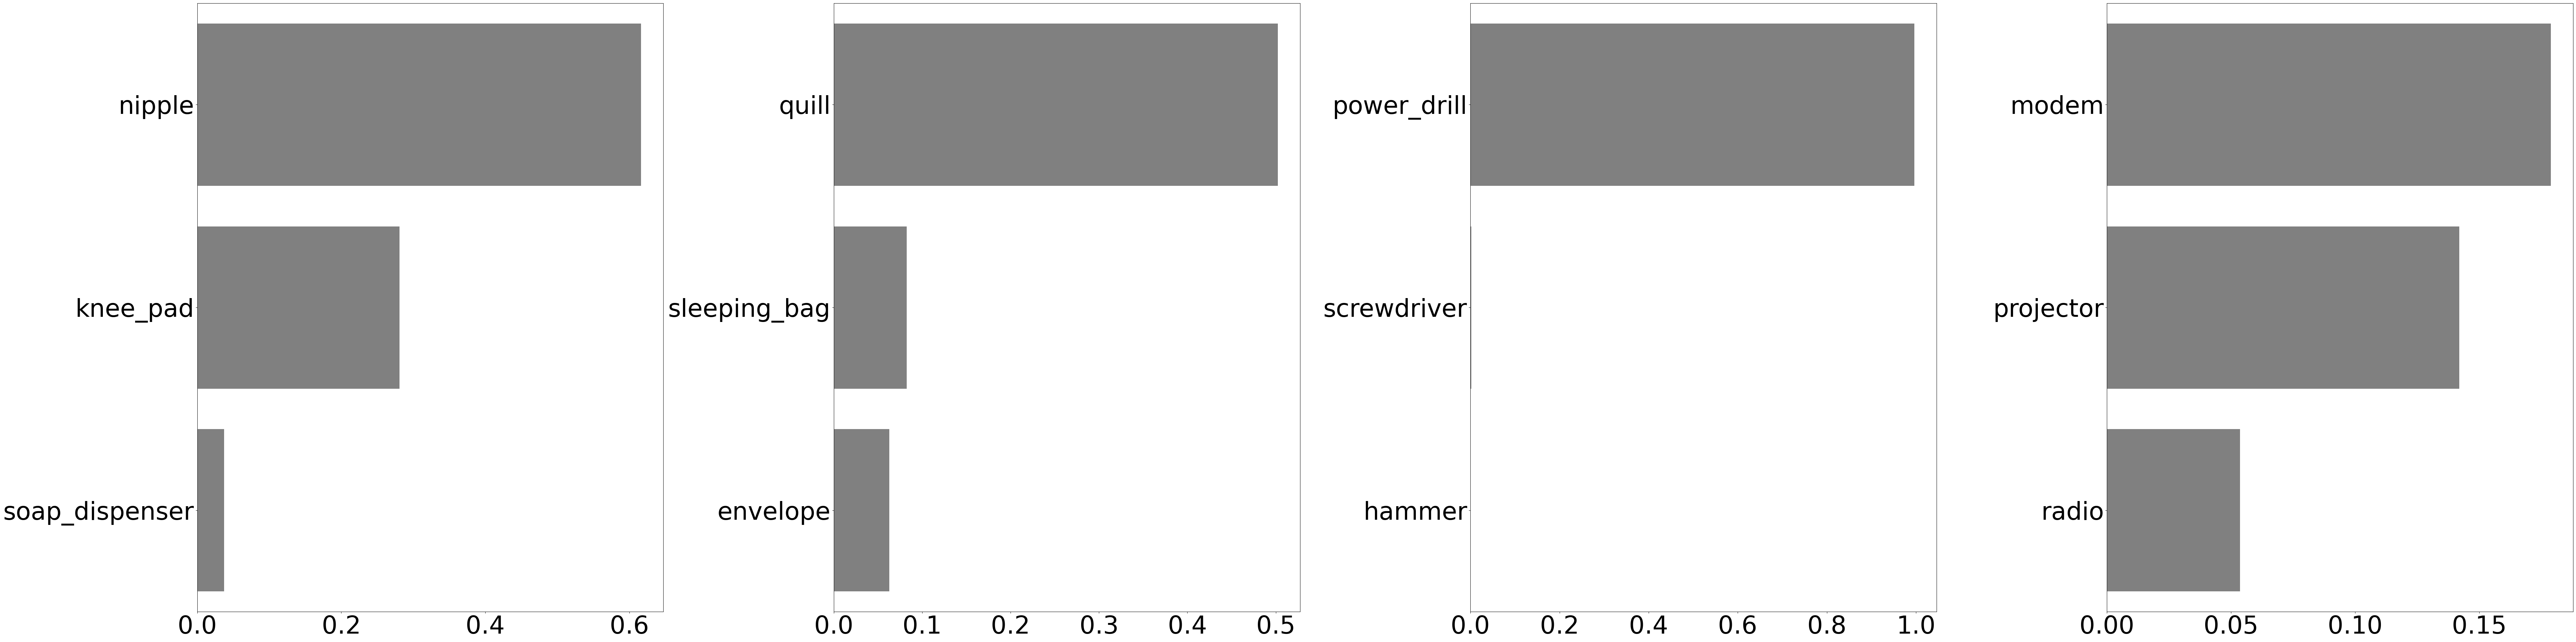

In [33]:
from keras.applications.vgg16 import VGG16, decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt 
from PIL import Image 
import seaborn as sns
import pandas as pd 
import numpy as np 
import os 

vgg16_weights = 'weights/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
vgg16_model = VGG16(weights=vgg16_weights)

image_directory = "images/"
# List all image files in the directory
imgs = [os.path.join(image_directory, img) for img in os.listdir(image_directory) if img.endswith(('.jpg', '.jpeg', '.png'))]

# If you only want the first 4 images
imgs = imgs[4:8]

def _load_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img 

def _get_predictions(_model):
    f, ax = plt.subplots(1, 4)
    f.set_size_inches(80, 40)
    for i in range(4):
        ax[i].imshow(Image.open(imgs[i]).resize((200, 200), Image.LANCZOS))
    plt.show()
    
    f, axes = plt.subplots(1, 4)
    f.set_size_inches(80, 20)
    for i,img_path in enumerate(imgs):
        img = _load_image(img_path)
        preds  = decode_predictions(_model.predict(img), top=3)[0]
        b = sns.barplot(y=[c[1] for c in preds], x=[c[2] for c in preds], color="gray", ax=axes[i])
        b.tick_params(labelsize=55)
        f.tight_layout()

_get_predictions(vgg16_model)


## 1.4 Resnets


All the previous models used deep neural networks in which they stacked many convolution layers one after the other. It was learnt that deeper networks are performing better. However, it turned out that this is not really true. Following are the problems with deeper networks: 

- Network becomes difficult to optimize  
- Vanishing / Exploding Gradeints  
- Degradation Problem ( accuracy first saturates and then degrades )  

### Skip Connections   

So to address these problems, authors of the resnet architecture came up with the idea of skip connections with the hypothesis that the deeper layers should be able to learn something as equal as shallower layers. A possible solution is copying the activations from shallower layers and setting additional layers to identity mapping.   

So the role of these connections is to perform identity function over the activation of shallower layer, which in-turn produces the same activation. This output is then added with the activation of the next layer. To enable these connections or essentially enable this addition operation, one need to ensure the same dimentions of convolutions through out the network, that's why resnets have same 3 by 3 convolutions throughout. 

### Key Advantage 

By using residual blocks in the network, one can construct networks of any depth with the hypothesis that new layers are actually helping to learn new underlying patterns in the input data. The authors of the paper were able to create the deep neural network architecture with 152 layers. The variants of Resnets such as resnet34, resnet50, resnet101 have produced the solutions with very high accuracy in Imagenet competitions. 


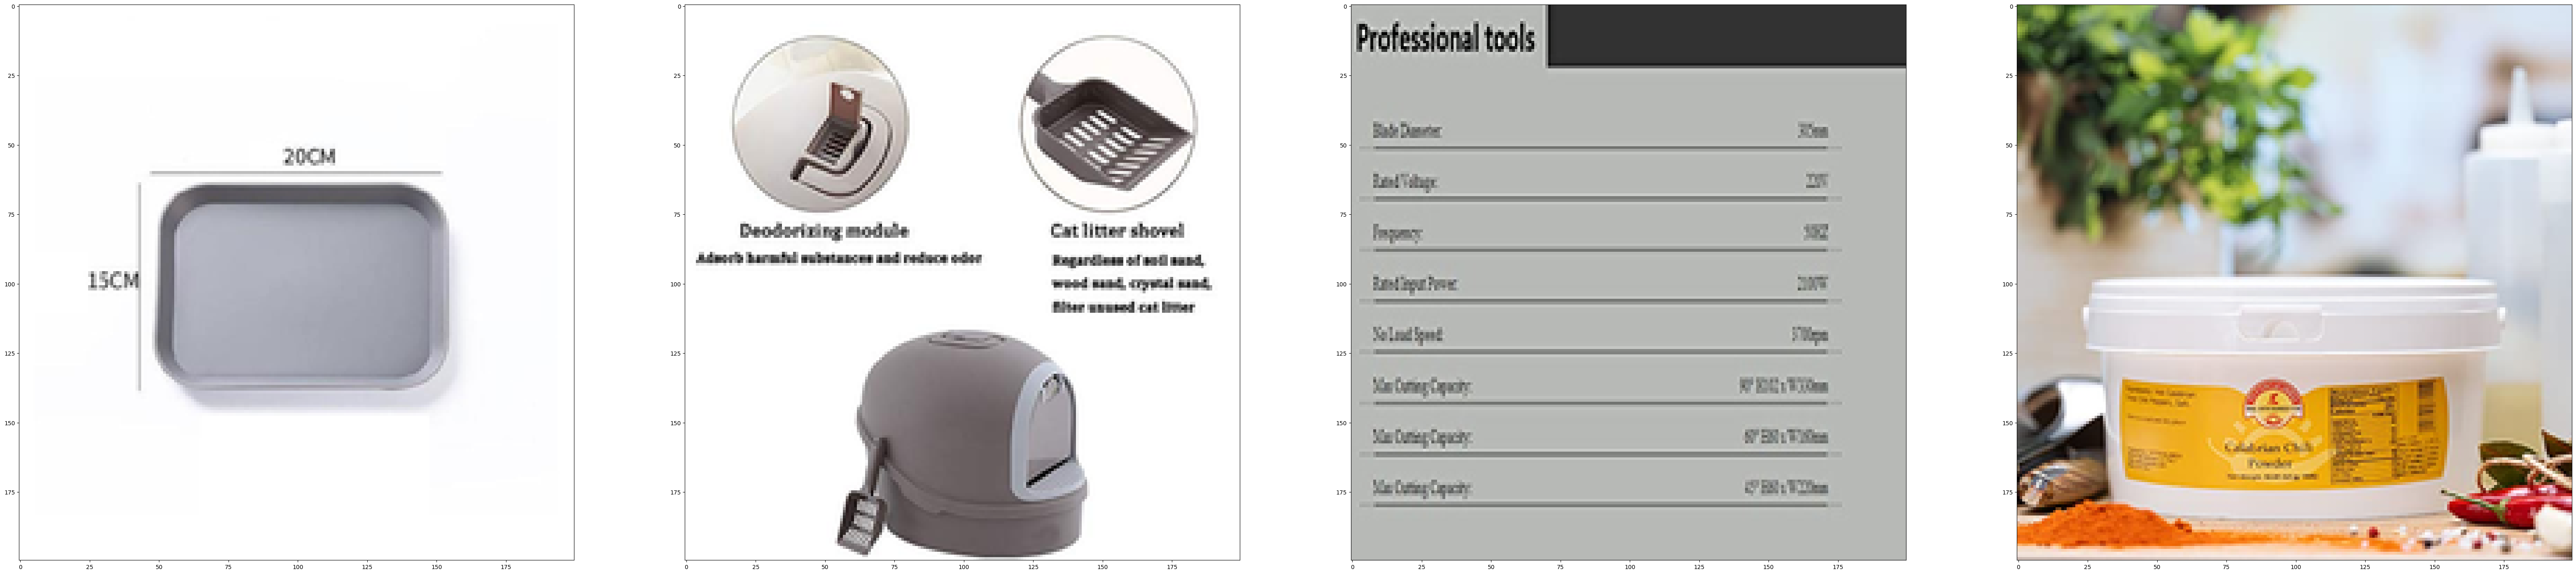

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


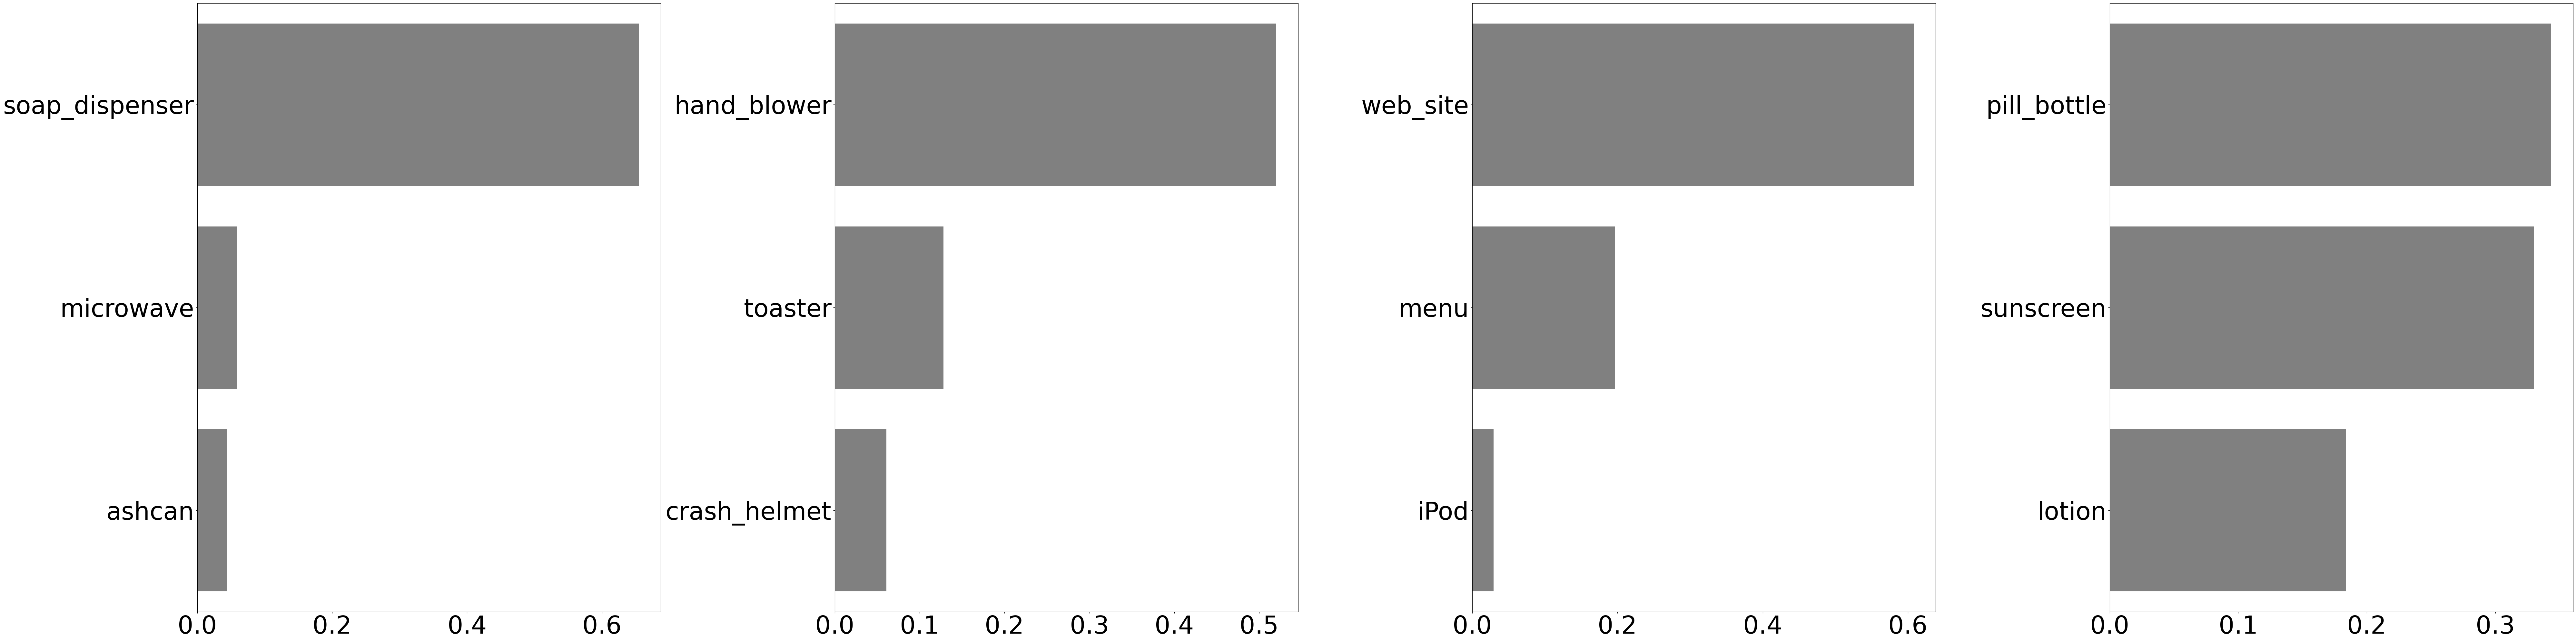

In [19]:
from keras.applications.resnet50 import ResNet50
resnet_weights = 'weights/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
resnet_model = ResNet50(weights=resnet_weights)
_get_predictions(resnet_model)

## 1.5 Xception Nets

Xception is an extension of the Inception architecture which replaces the standard Inception modules with depthwise separable convolutions.

In [8]:
from keras.applications.xception import Xception
xception_weights = '../input/xception/xception_weights_tf_dim_ordering_tf_kernels.h5'
xception_model = Xception(weights=xception_weights)

## 2. Image Feature Extraction using PreTrained Models 

Lets look at how one can use pre-trained models for feature extraction, The extracted features can be used for Machine Learning purposes. 

First step is to load the weights of the pre-trained model in the model architecture. Notice, that an additional argument is passed include_top = False, which states that we do not want to add the last layer of this architecture. 

In [20]:
resnet50 = ResNet50(weights='imagenet', include_top=False)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 142s 1us/step


As the next step, we will pass an image to this model and identify the features. 

In [21]:
def _get_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    resnet_features = resnet50.predict(img_data)
    return resnet_features

img_path = "images/41ADVPQgZOL.jpg"
resnet_features = _get_features(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Now the extracted features are stored in the variable resnet_features. One can flatten them or sequee them in order to use them in ML models.  Flatten will produce a long vector of feature elements. Squeeze will produce a 3D matrix of the features

In [22]:
features_representation_1 = resnet_features.flatten()
features_representation_2 = resnet_features.squeeze()

print ("Shape 1: ", features_representation_1.shape)
print ("Shape 2: ", features_representation_2.shape)

Shape 1:  (100352,)
Shape 2:  (7, 7, 2048)


## 3. Transfer Learning Example 

<br>

Lets look at the implemetation of transfer learning using pre-trained model features. First, we 'll create a dataset containing two classes of images : bananas and strawberrys. Also add a test dataset contianing images from both classes.

### 3.1 Dataset Preparation

In [12]:
basepath = "../input/fruits/fruits-360_dataset/fruits-360/Training/"
class1 = os.listdir(basepath + "Banana/")
class2 = os.listdir(basepath + "Strawberry/")

data = {'banana': class1[:10], 
        'strawberry': class2[:10], 
        'test': [class1[11], class2[11]]}

Transfer learning can be implemented in two steps: 

Step 1 : Image Feature Exraction  
Step 2 : Training a Classifier  

### Step 1 : Feature Extraction using pre-trained models (resnet50)

Iterate in the images, call the same function used in point 2 for image feature extraction, we will use the flatten representation of these features 

In [13]:
features = {"banana" : [], "strawberry" : [], "test" : []}
testimgs = []
for label, val in data.items():
    for k, each in enumerate(val):        
        if label == "test" and k == 0:
            img_path = basepath + "/Banana/" + each
            testimgs.append(img_path)
        elif label == "test" and k == 1:
            img_path = basepath + "/Strawberry/" + each
            testimgs.append(img_path)
        else: 
            img_path = basepath + label.title() + "/" + each
        feats = _get_features(img_path)
        features[label].append(feats.flatten())        

Next, Convert the features from dictionary format to pandas dataframe. A long dataframe will be created. I will be applying variance filter later on this dataframe to reduce the dimentionality. Other ideas to avoid this step : perform PCA / SVD to obtain the dense features. 

In [14]:
dataset = pd.DataFrame()
for label, feats in features.items():
    temp_df = pd.DataFrame(feats)
    temp_df['label'] = label
    dataset = dataset.append(temp_df, ignore_index=True)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,100313,100314,100315,100316,100317,100318,100319,100320,100321,100322,100323,100324,100325,100326,100327,100328,100329,100330,100331,100332,100333,100334,100335,100336,100337,100338,100339,100340,100341,100342,100343,100344,100345,100346,100347,100348,100349,100350,100351,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.087221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.750425,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,banana
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.144712,0.0,0.0,0.0,0.0,0.327224,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,banana
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.721295,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,banana
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.032005,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,banana
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.810367,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.985928,0.0,0.0,0.0,0.0,0.0,0.0,0.380078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,banana


Prepare X (predictors) and y (target) from the dataset

In [15]:
y = dataset[dataset.label != 'test'].label
X = dataset[dataset.label != 'test'].drop('label', axis=1)

### Step 2: Write a classifier to predict two classes

We will write a simple neural network (multi layer perceptron classifier) using sklearn for training purposes. 

In [16]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

model = MLPClassifier(hidden_layer_sizes=(100, 10))
pipeline = Pipeline([('low_variance_filter', VarianceThreshold()), ('model', model)])
pipeline.fit(X, y)

print ("Model Trained on pre-trained features")

Model Trained on pre-trained features


Let's predict the output on new images and check the outcome.

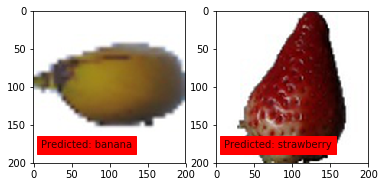

In [17]:
preds = pipeline.predict(features['test'])

f, ax = plt.subplots(1, 2)
for i in range(2):
    ax[i].imshow(Image.open(testimgs[i]).resize((200, 200), Image.ANTIALIAS))
    ax[i].text(10, 180, 'Predicted: %s' % preds[i], color='k', backgroundcolor='red', alpha=0.8)
plt.show()

So a simple neural network with only 20 rows of training data is able to correctly classify the two images on test set. 